# Implementation of t-SNE for Flair Transcript Quantification Data

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.pyplot import gcf
import matplotlib.gridspec
%matplotlib inline
import re
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making

### Import and Clean Data

In [2]:
os.getcwd()

'C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research\\gtex_v9_data_analysis\\FLAIR\\work_in_progress'

In [3]:
data_dir = 'gtex_v9_data\\data_for_analysis\\gtex_database_data'
novel_transcript_quant_clean_path = os.path.join(data_dir, 
                                                      'flair_novel_transcript_quant_clean.csv')
novel_transcript_quant_clean_filtered_path = os.path.join(data_dir, 
                                                      'flair_novel_transcript_quant_clean_filtered.csv')
annotated_transcript_quant_clean_path = os.path.join(data_dir, 
                                                      'flair_annotated_transcript_quant_clean.csv')
annotated_transcript_quant_clean_filtered_path = os.path.join(data_dir, 
                                                      'flair_annotated_transcript_quant_clean_filtered.csv')

In [4]:
# change working directory
os.chdir('C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research')

In [5]:
novel_transcript_express_tissue_clean = pd.read_csv(novel_transcript_quant_clean_path)
novel_transcript_express_tissue_clean_filtered = pd.read_csv(novel_transcript_quant_clean_filtered_path)
annotated_transcript_express_tissue_clean = pd.read_csv(annotated_transcript_quant_clean_path)
annotated_transcript_express_tissue_clean_filtered = pd.read_csv(annotated_transcript_quant_clean_filtered_path)

### Dataframe of Novel Transcripts

### No Filter

In [6]:
novel_transcript_express_tissue_clean.head(3)

,Unnamed: 0,sample_id,tissue,000187c4-a488-40f0-a69c-0a89582f3241_ENSG00000173848.18,00026598-3078-4e2f-8ac9-dd8f523396b9_ENSG00000102893.15_ENSG00000102893.15,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000071575.11_ENSG00000071575.11,000339f1-1769-4608-b369-59aa222cd7b7_ENSG00000166012.16_ENSG00000166012.16,0003706a-94a7-4419-a61d-6310d7a9c10c_ENSG00000101247.17_ENSG00000101247.17,0004a186-852c-448e-a74c-afdad4fdf319_ENSG00000204356.13_ENSG00000204356.13,0004af18-8dff-40d9-814d-32a45ded762e_ENSG00000007237.18_ENSG00000007237.18,...,fff834dd-554d-46c7-b30a-b92e4be6dd61_ENSG00000131069.19,fff8c888-5eac-4f53-af8e-30a9aa66be58_ENSG00000140750.16,fff8d294-c55c-4453-9aa7-7d8db1e114e2_ENSG00000188917.14_ENSG00000188917.14,fff941ee-d99e-4f68-94b0-4b5ab30a789c_ENSG00000232973.11_ENSG00000232973.11,fffa0051-00fd-4289-86c4-114fa1fd36a1_ENSG00000197444.9_ENSG00000197444.9,fffa90eb-bfc8-49d3-9936-cd1d4ea47708_ENSG00000141030.12_ENSG00000141030.12,fffabc59-08f8-4f01-9835-099e5dfe5bd6_ENSG00000113407.13_ENSG00000113407.13,fffc8c18-b616-42ce-8c53-71b184c0cab8_ENSG00000156261.12_ENSG00000156261.12,fffd4120-f790-4c5d-b903-52dc4a97c8e7_ENSG00000137171.14_ENSG00000137171.14,fffe94ff-bd9f-4c45-b693-96945bf0f3dc_ENSG00000106049.8_ENSG00000106049.8
0,0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),0.0,0.0,0.380702,0.000000,14.847375,0.761404,0.0,...,0.0,0.0,0.0,8.756144,0.000000,0.761404,0.000000,0.000000,0.000000,0.000000
1,1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,0.0,0.0,5.359084,0.297727,18.459067,0.297727,0.0,...,0.0,0.0,0.0,0.000000,0.595454,2.679542,0.595454,0.297727,0.893181,0.297727
2,2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),0.0,0.0,1.961873,0.000000,17.656857,0.000000,0.0,...,0.0,0.0,0.0,3.923746,0.000000,0.000000,0.000000,0.000000,0.980936,0.000000


In [7]:
# drop the first column
novel_transcript_express_tissue_clean.drop(columns=novel_transcript_express_tissue_clean.columns[0], 
                                       axis=1, inplace=True)
novel_transcript_express_tissue_clean.head(3)

,sample_id,tissue,000187c4-a488-40f0-a69c-0a89582f3241_ENSG00000173848.18,00026598-3078-4e2f-8ac9-dd8f523396b9_ENSG00000102893.15_ENSG00000102893.15,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000071575.11_ENSG00000071575.11,000339f1-1769-4608-b369-59aa222cd7b7_ENSG00000166012.16_ENSG00000166012.16,0003706a-94a7-4419-a61d-6310d7a9c10c_ENSG00000101247.17_ENSG00000101247.17,0004a186-852c-448e-a74c-afdad4fdf319_ENSG00000204356.13_ENSG00000204356.13,0004af18-8dff-40d9-814d-32a45ded762e_ENSG00000007237.18_ENSG00000007237.18,0004bfb5-133e-4202-9562-4744a79252db_ENSG00000066697.14_ENSG00000066697.14,...,fff834dd-554d-46c7-b30a-b92e4be6dd61_ENSG00000131069.19,fff8c888-5eac-4f53-af8e-30a9aa66be58_ENSG00000140750.16,fff8d294-c55c-4453-9aa7-7d8db1e114e2_ENSG00000188917.14_ENSG00000188917.14,fff941ee-d99e-4f68-94b0-4b5ab30a789c_ENSG00000232973.11_ENSG00000232973.11,fffa0051-00fd-4289-86c4-114fa1fd36a1_ENSG00000197444.9_ENSG00000197444.9,fffa90eb-bfc8-49d3-9936-cd1d4ea47708_ENSG00000141030.12_ENSG00000141030.12,fffabc59-08f8-4f01-9835-099e5dfe5bd6_ENSG00000113407.13_ENSG00000113407.13,fffc8c18-b616-42ce-8c53-71b184c0cab8_ENSG00000156261.12_ENSG00000156261.12,fffd4120-f790-4c5d-b903-52dc4a97c8e7_ENSG00000137171.14_ENSG00000137171.14,fffe94ff-bd9f-4c45-b693-96945bf0f3dc_ENSG00000106049.8_ENSG00000106049.8
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),0.0,0.0,0.380702,0.000000,14.847375,0.761404,0.0,0.000000,...,0.0,0.0,0.0,8.756144,0.000000,0.761404,0.000000,0.000000,0.000000,0.000000
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,0.0,0.0,5.359084,0.297727,18.459067,0.297727,0.0,0.595454,...,0.0,0.0,0.0,0.000000,0.595454,2.679542,0.595454,0.297727,0.893181,0.297727
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),0.0,0.0,1.961873,0.000000,17.656857,0.000000,0.0,0.000000,...,0.0,0.0,0.0,3.923746,0.000000,0.000000,0.000000,0.000000,0.980936,0.000000


In [8]:
num_novel_transcripts = novel_transcript_express_tissue_clean.shape[1]-2
print("Number of Novel Transcripts: ", num_novel_transcripts)

Number of Novel Transcripts:  72273


### Filter Applied

In [9]:
# drop the first column
novel_transcript_express_tissue_clean_filtered.drop(columns=novel_transcript_express_tissue_clean_filtered.columns[0], 
                                       axis=1, inplace=True)
novel_transcript_express_tissue_clean_filtered.head(3)

,sample_id,tissue,0002a5e2-f01a-4690-a7db-7af726712a5e_ENSG00000071575.11_ENSG00000071575.11,0003706a-94a7-4419-a61d-6310d7a9c10c_ENSG00000101247.17_ENSG00000101247.17,0004bfb5-133e-4202-9562-4744a79252db_ENSG00000066697.14_ENSG00000066697.14,0005f2e9-ea77-45a6-9ae4-f8c2990b165e_ENSG00000100296.13_ENSG00000100296.13,0016b099-8dcc-460d-9d7d-dc9443a490a1_ENSG00000131507.10_ENSG00000131507.10,0024f966-977a-4085-bfad-70aab00544c9_chr20:45970000_chr20:45970000,00296fb4-cf8b-4405-837e-2366b814b986_ENSG00000075884.13_ENSG00000075884.13,0030624f-ad69-4841-957f-e659b079b3ab_ENSG00000114019.14_ENSG00000114019.14,...,ffc1795c-a0a5-48c7-96b6-6d25829849b0_chr1:172366000_chr1:172366000,ffc35d5c-68b8-443f-86b0-6b5f4f57d199_ENSG00000168002.11_ENSG00000168002.11,ffc48bde-53f4-45df-8912-cfb9fa25bcfa-1_ENSG00000104611.11_ENSG00000104611.11,ffc52f34-a6c6-4dac-af97-6d2f4f27db65_ENSG00000168003.16_ENSG00000168003.16,ffcab65e-81fc-4819-9a34-9bd7179b9fb5_ENSG00000117425.13_ENSG00000117425.13,ffcbb15a-0409-471f-97e2-909c083084ad_ENSG00000066044.14_ENSG00000066044.14,ffcd666a-24a9-4d16-8cc3-9922b6bdd8d6_chr8:24953000_ENSG00000277586.2,ffdd9470-700c-4445-b294-12f7640a4779_ENSG00000082153.17_ENSG00000082153.17,ffe59936-8224-4b94-8444-53aa6229ee91_ENSG00000011009.10_ENSG00000011009.10,fff2fd1d-3961-4657-bf61-1637498fce2a_ENSG00000143624.13
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),0.380702,14.847375,0.000000,0.761404,57.866691,0.761404,0.380702,0.380702,...,5.710529,100.886008,1.142106,1.522808,2.284211,0.000000,4.568423,1.903510,1.142106,3.807019
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,5.359084,18.459067,0.595454,0.297727,54.781747,2.084088,0.000000,0.000000,...,39.597676,160.177064,0.000000,8.336353,10.122714,2.977269,2.381815,0.595454,7.145445,10.718168
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),1.961873,17.656857,0.000000,0.000000,102.998330,1.961873,0.980936,0.000000,...,29.428094,117.712378,0.000000,5.885619,4.904682,4.904682,1.961873,0.000000,0.000000,16.675920


In [10]:
num_novel_filtered_transcripts = novel_transcript_express_tissue_clean_filtered.shape[1]-2
print("Number of Novel Filtered Transcripts: ", num_novel_filtered_transcripts)

Number of Novel Filtered Transcripts:  18217


### Dataframe of Annotated Transcripts

### No Filter

In [11]:
annotated_transcript_express_tissue_clean.head(3)

,Unnamed: 0,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,...,ENST00000640621.1_ENSG00000262633.2,ENST00000640621.1-1_ENSG00000262633.2,ENST00000640674.1_ENSG00000278175.3,ENST00000640752.1_ENSG00000138796.16,ENST00000640769.1_ENSG00000176225.13,ENST00000640799.1_ENSG00000143612.19,ENST00000640815.1_ENSG00000164199.16,ENST00000640876.1_ENSG00000197563.10,ENST00000640893.1_ENSG00000087258.14,ENST00000640967.1_ENSG00000082212.12
0,0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),373.468579,20.557903,22.080711,0.000000,3.045615,3.045615,5.710529,...,2.664913,0.0,3.045615,0.380702,0.000000,0.380702,1.522808,0.0,7.233336,0.380702
1,1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,369.181337,16.374979,24.115878,2.084088,0.595454,2.679542,1.786361,...,1.786361,0.0,1.786361,0.297727,0.893181,0.893181,0.595454,0.0,7.145445,0.297727
2,2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),256.024421,9.809365,7.847492,0.000000,0.980936,6.866555,0.980936,...,2.942809,0.0,2.942809,0.000000,0.980936,0.000000,0.980936,0.0,4.904682,0.000000


In [12]:
# drop the first column
annotated_transcript_express_tissue_clean.drop(columns=annotated_transcript_express_tissue_clean.columns[0], 
                                       axis=1, inplace=True)
annotated_transcript_express_tissue_clean.head(3)

,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,ENST00000002596.5_ENSG00000002587.9,...,ENST00000640621.1_ENSG00000262633.2,ENST00000640621.1-1_ENSG00000262633.2,ENST00000640674.1_ENSG00000278175.3,ENST00000640752.1_ENSG00000138796.16,ENST00000640769.1_ENSG00000176225.13,ENST00000640799.1_ENSG00000143612.19,ENST00000640815.1_ENSG00000164199.16,ENST00000640876.1_ENSG00000197563.10,ENST00000640893.1_ENSG00000087258.14,ENST00000640967.1_ENSG00000082212.12
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),373.468579,20.557903,22.080711,0.000000,3.045615,3.045615,5.710529,1.142106,...,2.664913,0.0,3.045615,0.380702,0.000000,0.380702,1.522808,0.0,7.233336,0.380702
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,369.181337,16.374979,24.115878,2.084088,0.595454,2.679542,1.786361,25.902239,...,1.786361,0.0,1.786361,0.297727,0.893181,0.893181,0.595454,0.0,7.145445,0.297727
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),256.024421,9.809365,7.847492,0.000000,0.980936,6.866555,0.980936,0.980936,...,2.942809,0.0,2.942809,0.000000,0.980936,0.000000,0.980936,0.0,4.904682,0.000000


In [13]:
num_annotated_transcripts = annotated_transcript_express_tissue_clean.shape[1]-2

In [14]:
print("Number of Annotated Transcripts: ", num_annotated_transcripts)

Number of Annotated Transcripts:  21357


### Filter Applied

In [15]:
annotated_transcript_express_tissue_clean_filtered.drop(columns=annotated_transcript_express_tissue_clean_filtered.columns[0], 
                                       axis=1, inplace=True)
num_annotated_filtered_transcripts = annotated_transcript_express_tissue_clean_filtered.shape[1]-2
print("Number of Annotated Filtered Transcripts: ", num_annotated_filtered_transcripts)

Number of Annotated Filtered Transcripts:  12046


In [16]:
annotated_transcript_express_tissue_clean_filtered.head(3)

,sample_id,tissue,ENST00000000233.9_ENSG00000004059.10,ENST00000000412.7_ENSG00000003056.7,ENST00000001008.5_ENSG00000004478.7,ENST00000001146.6_ENSG00000003137.8,ENST00000002125.8_ENSG00000003509.15,ENST00000002165.10_ENSG00000001036.13,ENST00000002501.10_ENSG00000003249.13,ENST00000002596.5_ENSG00000002587.9,...,ENST00000640051.1_ENSG00000262633.2,ENST00000640099.1_ENSG00000089818.17,ENST00000640218.1_ENSG00000153187.18,ENST00000640443.1_ENSG00000108433.16,ENST00000640608.1_ENSG00000262633.2,ENST00000640610.1_ENSG00000007372.21,ENST00000640621.1_ENSG00000262633.2,ENST00000640769.1_ENSG00000176225.13,ENST00000640815.1_ENSG00000164199.16,ENST00000640893.1_ENSG00000087258.14
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),373.468579,20.557903,22.080711,0.000000,3.045615,3.045615,5.710529,1.142106,...,17.131586,2.284211,4.568423,4.187721,3.045615,0.380702,2.664913,0.000000,1.522808,7.233336
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,369.181337,16.374979,24.115878,2.084088,0.595454,2.679542,1.786361,25.902239,...,5.954538,4.465903,8.634080,7.443172,1.786361,2.679542,1.786361,0.893181,0.595454,7.145445
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),256.024421,9.809365,7.847492,0.000000,0.980936,6.866555,0.980936,0.980936,...,5.885619,0.000000,2.942809,2.942809,0.980936,0.000000,2.942809,0.980936,0.980936,4.904682


## Part 2: PCA Initialization before t-SNE

t-SNE is computationally expensive especially for large datasets. PCA initialization can help improve the performance and stability of t-SNE.

In [17]:
def PCA_initialization_for_tSNE(df,num_components):
    df_for_decomp = df.iloc[:,2:] #transcript quantification data only
    df_for_decomp = df_for_decomp.astype('float') #change data type from object to numeric
    # scale the transcript quantification data before PCA
    scaler = StandardScaler()
    df_for_decomp_sc = scaler.fit_transform(df_for_decomp)
    pca = PCA(num_components)  
    transcript_data_projected = pca.fit_transform(df_for_decomp_sc)
    return transcript_data_projected

#### Novel Transcripts No Filter

In [18]:
novel_pc_initialized = PCA_initialization_for_tSNE(novel_transcript_express_tissue_clean,50)

In [19]:
novel_pc_initialized.shape

(88, 50)

#### Novel Transcripts Filter Applied

In [20]:
novel_filtered_pc_initialized = PCA_initialization_for_tSNE(novel_transcript_express_tissue_clean_filtered,50)
novel_filtered_pc_initialized.shape

(88, 50)

#### Annotated Transcripts No Filter

In [21]:
annotated_pc_initialized = PCA_initialization_for_tSNE(annotated_transcript_express_tissue_clean,50)

In [22]:
annotated_pc_initialized.shape

(88, 50)

#### Annotated Transcripts Filter Applied

In [23]:
annotated_filtered_pc_initialized = PCA_initialization_for_tSNE(annotated_transcript_express_tissue_clean_filtered,50)
annotated_filtered_pc_initialized.shape

(88, 50)

## Part 3:  t-SNE and Visualization

In [24]:
# color dictionary (same color palette used in Glinos paper)
color_dict = {"Adipose - Subcutaneous":"#ffc0cb",
             "Brain - Anterior cingulate cortex (BA24)":"#8d5b96",
             "Brain - Caudate (basal ganglia)":"#7776b1",
             "Brain - Cerebellar Hemisphere":"#9773ba",
             "Brain - Frontal Cortex (BA9)":"#b873ba",
             "Brain - Putamen (basal ganglia)":"#c893c9",
             "Breast - Mammary Tissue":"#ff69b4",
             "Cells - Cultured fibroblasts":"#d4a910",
             "Heart - Atrial Appendage":"#c4625d",
             "Heart - Left Ventricle":"#bc3c28",
             "Liver":"#815375",
             "Lung":"#0072b5",
             "Muscle - Skeletal":"#1f854e",
             "Pancreas":"#e18726"}

In [25]:
def test_perplexity(data, perplexities):
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))
    axs = axs.ravel()
    for i, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2,perplexity=perplexity,random_state=123,n_iter=3000)
        transformed = tsne.fit_transform(data)
        # organize t-SNE embeddings into a dataframe and add tissue type information
        transformed_df = pd.DataFrame(transformed,columns=['Embed1', 'Embed2'])
        transformed_df['tissue'] = annotated_transcript_express_tissue_clean['tissue']
        # plot t-SNE in 2 dimensions
        for key, group in transformed_df.groupby(['tissue']):
            axs[i].plot(group.Embed1, group.Embed2, 'o', c=color_dict.get(key), label=key)
        axs[i].set_title("Perplexity: {}".format(perplexity))
    plt.legend(bbox_to_anchor=(-2.5, 0), ncol=3, loc="upper left",borderaxespad=3)
    plt.show()

### Novel Transcripts t-SNE Visualization (No Filter)

In [26]:
novel_perplexities_to_test_l1 = list(range(5,14))

In [27]:
len(novel_perplexities_to_test_l1)

9

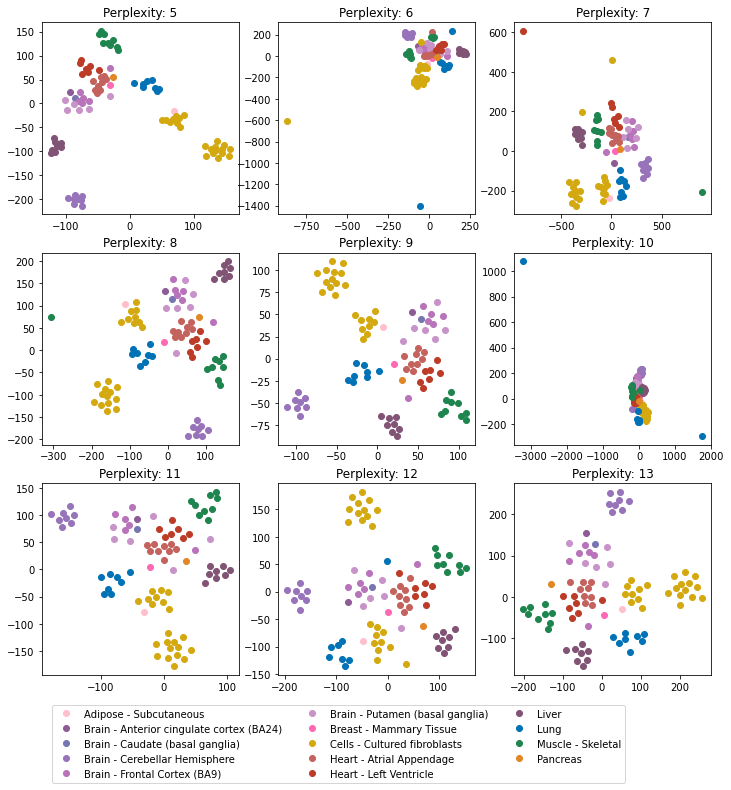

In [28]:
test_perplexity(novel_pc_initialized, novel_perplexities_to_test_l1)

In [29]:
novel_perplexities_to_test_l2 = list(range(14,23))
len(novel_perplexities_to_test_l2)

9

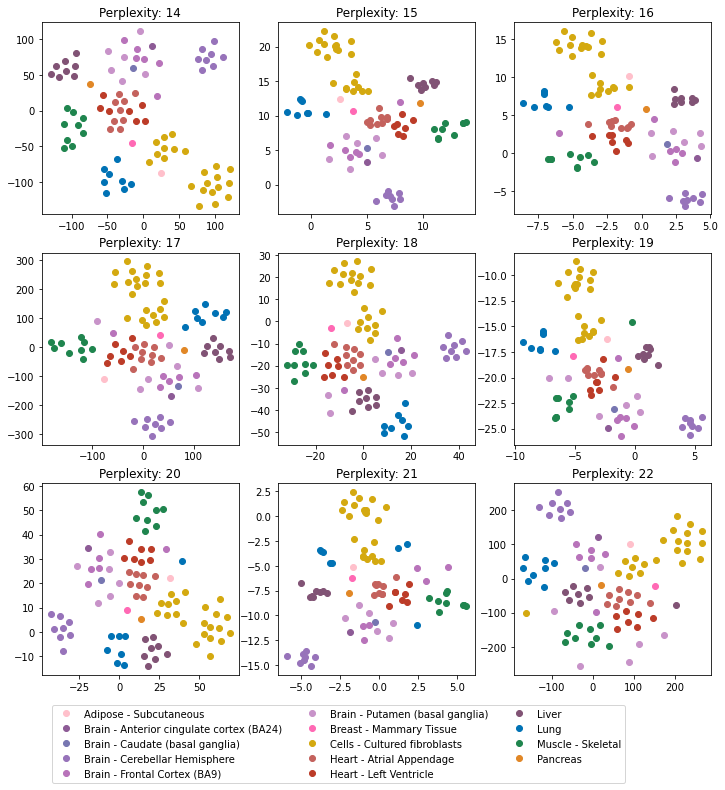

In [30]:
test_perplexity(novel_pc_initialized, novel_perplexities_to_test_l2)

### Novel Transcripts t-SNE Visualization (Filter Applied)

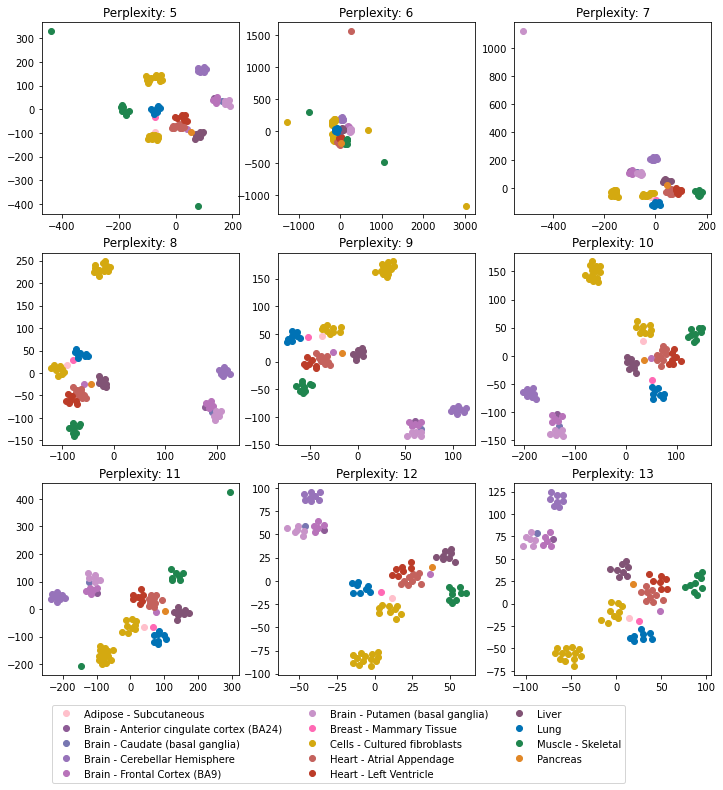

In [31]:
test_perplexity(novel_filtered_pc_initialized, novel_perplexities_to_test_l1)

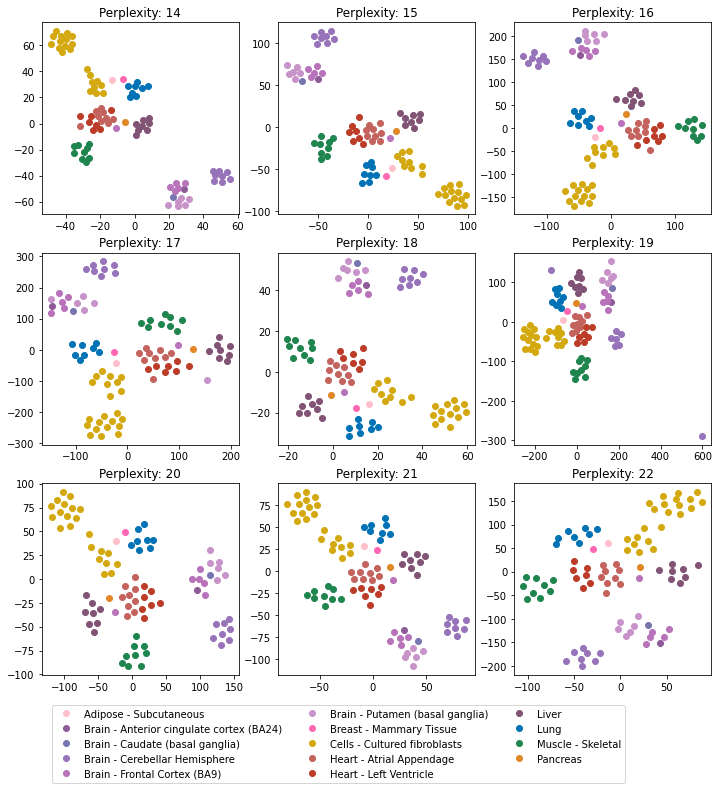

In [32]:
test_perplexity(novel_filtered_pc_initialized, novel_perplexities_to_test_l2)

### Annotated Transcripts t-SNE Visualization (No Filter)

In [33]:
annotated_perplexities_to_test_l1 = list(range(5,14))

In [34]:
len(annotated_perplexities_to_test_l1)

9

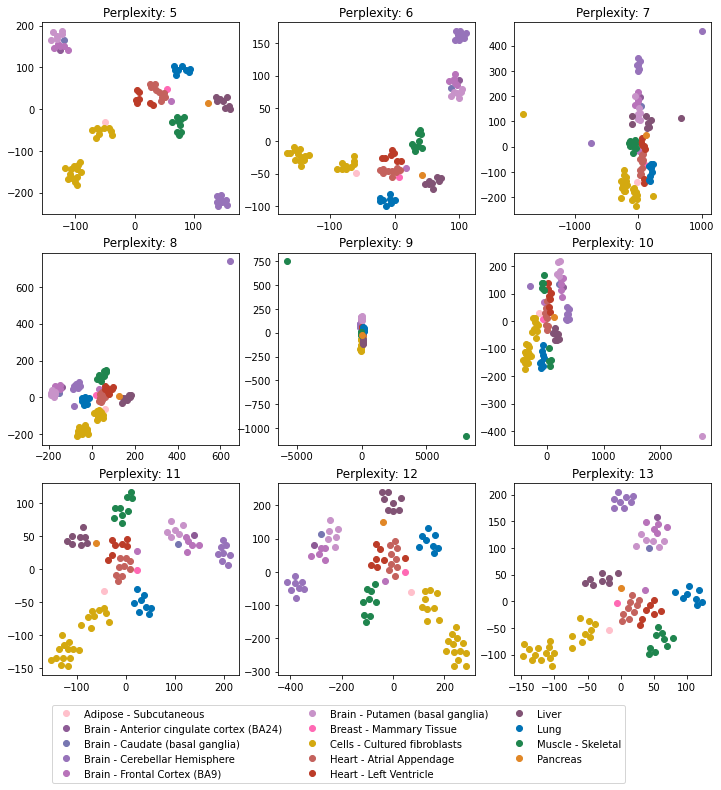

In [35]:
test_perplexity(annotated_pc_initialized, annotated_perplexities_to_test_l1)

In [36]:
annotated_perplexities_to_test_l2 = list(range(14,23))
len(annotated_perplexities_to_test_l2)

9

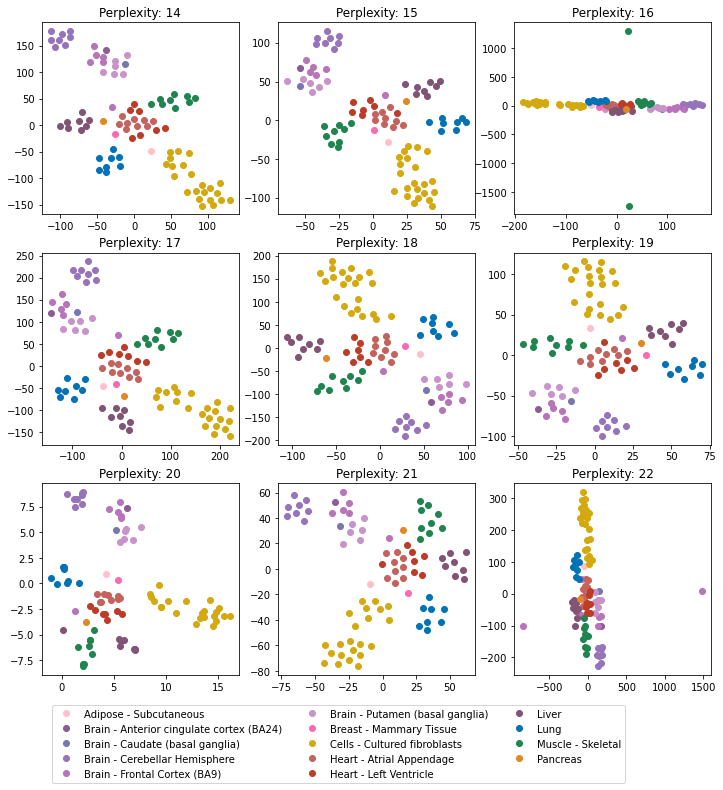

In [37]:
test_perplexity(annotated_pc_initialized, annotated_perplexities_to_test_l2)

### Annotated Transcripts t-SNE Visualization (Filter Applied)

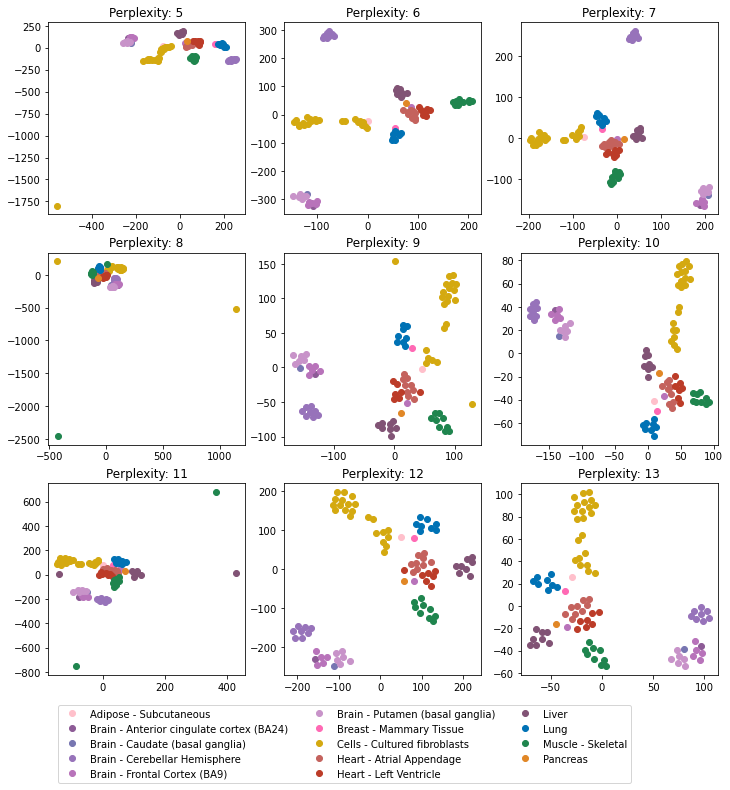

In [38]:
test_perplexity(annotated_filtered_pc_initialized, annotated_perplexities_to_test_l1)

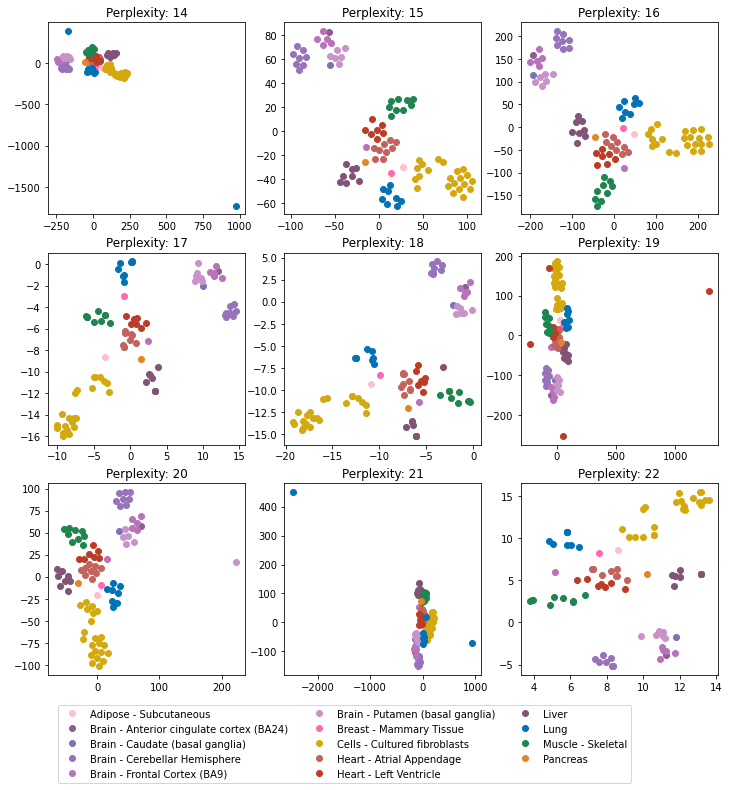

In [39]:
test_perplexity(annotated_filtered_pc_initialized, annotated_perplexities_to_test_l2)